In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
landmarks_frame = pd.read_csv('DITS-full\DITS-full\DITS-detection\class\classes.csv')

n = 1
img_name = 'DITS-full\DITS-full\DITS-detection\class\image\\'+landmarks_frame.iloc[0, 0]
landmarks = landmarks_frame.iloc[n, 1]

print('Image name: {}'.format(img_name))
print('Type: {}'.format(landmarks))


Image name: DITS-full\DITS-full\DITS-detection\class\image\0.png
Type: 0


In [6]:
class StreetSignDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1]
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [7]:
transform = transforms.Compose([transforms.Resize(16),transforms.ToTensor()])

0 [[[ 90  88 100]
  [ 90  88 100]
  [ 90  88 100]
  ...
  [122 112 113]
  [122 112 113]
  [123 113 114]]

 [[ 89  87  99]
  [ 90  88 100]
  [ 89  87  99]
  ...
  [124 114 115]
  [127 117 118]
  [129 119 120]]

 [[ 88  86  94]
  [ 89  87  95]
  [ 89  87  95]
  ...
  [135 124 131]
  [137 126 133]
  [136 125 132]]

 ...

 [[ 67  64  49]
  [ 69  66  51]
  [ 72  69  54]
  ...
  [ 75  67  73]
  [ 76  68  74]
  [ 77  66  73]]

 [[ 69  66  51]
  [ 69  66  51]
  [ 75  72  57]
  ...
  [ 75  65  66]
  [ 77  67  68]
  [ 76  64  66]]

 [[ 77  74  59]
  [ 75  72  57]
  [ 76  73  58]
  ...
  [ 74  64  65]
  [ 75  65  66]
  [ 75  63  65]]] 0


NameError: name 'show_landmarks' is not defined

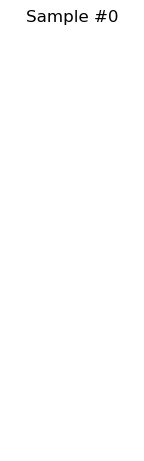

In [8]:
sign_dataset = StreetSignDataset('DITS-full\DITS-full\DITS-detection\class\classes.csv', 'DITS-full\DITS-full\DITS-detection\class\image', transform)

fig = plt.figure()

print(enumerate(sign_dataset))

for i, sample in enumerate(sign_dataset):
    print(i, sample['image'], sample['landmarks'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break